# Blazars features comparison in KDE

In [ ]:
import itertools as it

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from IPython import display as d

In [ ]:
df = pd.read_csv("blazars/bla_features.csv", skiprows=1,
                 names=["feature", "b356", "b216", "b206", "b360"]).set_index("feature")
df.head()

In [ ]:
no_feats = ['id', 'vs_catalog', 'vs_type', 'ra_k', 'dec_k', "cnt", "scls_k", "scls_j", "scls_h",]
path = "cone_search/gema_{tile}_sample.pkl.bz2"

feats = [
    'Amplitude', 'Autocor_length', 'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 
    'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0', 
    'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0', 
    'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0', 
    'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0', 
    'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0', 
    'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2', 'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_0',
    'Freq3_harmonics_rel_phase_1', 'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_rel_phase_3', 'Gskew', 'LinearTrend', 'MaxSlope', 'Mean', 
    'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'PercentAmplitude', 'PercentDifferenceFluxPercentile', 'PeriodLS',
    'Period_fit', 'Psi_CS', 'Psi_eta', 'Q31', 'Rcs', 'Skew', 'SmallKurtosis', 'Std']

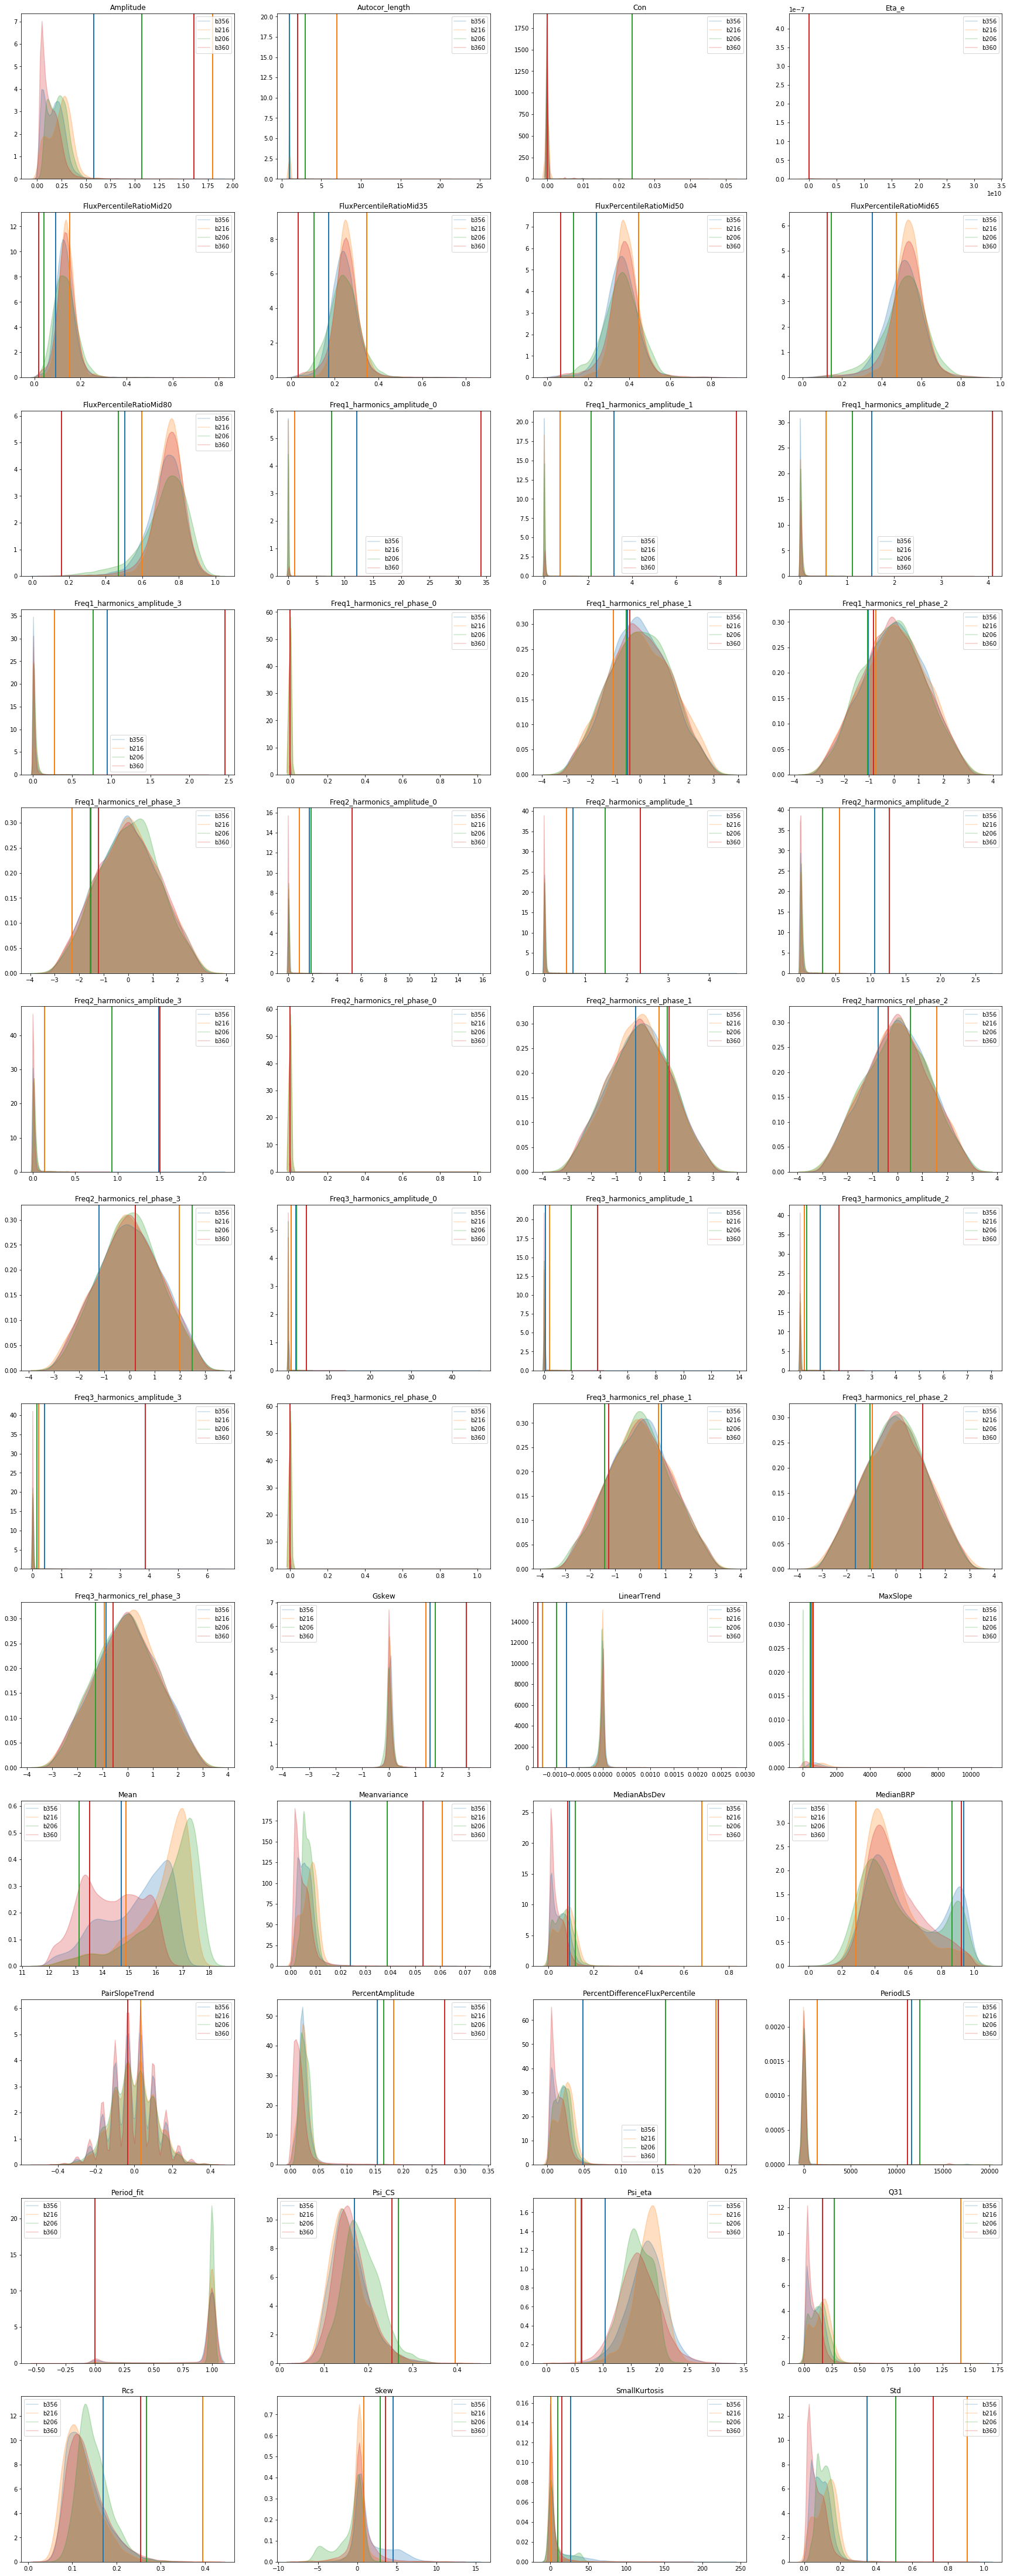

In [48]:
fig, axes = plt.subplots(13, 4, figsize=(30, 80))

faxes = {}
for feat, ax in zip(feats, it.chain(*axes)):
        ax.set_title(feat)
        faxes[feat] = ax


for tile in df.columns:

    tdf = pd.read_pickle(path.format(tile=tile))
    tdf = tdf.replace([np.inf, -np.inf], np.nan)
    
    for feat, ax in faxes.items():
        values = tdf[feat].dropna()
        blz = df[tile][feat]
        if not values.std():
            values[-1] = values[0] + 1
            
        try:
            sns.kdeplot(values, ax=ax, label=tile, shade=True, alpha=.25)
        except Exception as err:
            print(err, feat, tile, values.std())
        
        color = ax.get_lines()[-1].get_color()
        ax.axvline(blz, color=color, linewidth=2)